# 圖論（Graph Theory）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 圖
一個__圖__ $G$ 由  
一些**點**  
還有一些__邊__構成  
這裡邊指的是一些兩個點的集合  
**點集**通常記作 $V(G)$  
__邊集__通常記作 $E(G)$  

V(G) = [0, 1, 2, 3]
E(G) = [(0, 1), (0, 3), (1, 2), (2, 3)]


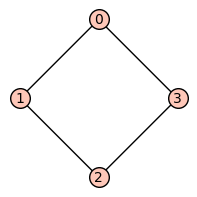

In [24]:
g = graphs.CycleGraph(4)
print("V(G) = %s"%g.vertices())
print("E(G) = %s"%g.edges(labels=False))
g.show(figsize=[2,2])

點沒有一定的位置  
（也沒有一定要用 $0,\ldots,n-1$ 標號）  
上下兩張圖是一模一樣的

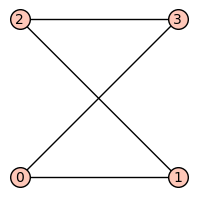

In [13]:
pos = {0:(0,0), 1:(1,0), 2:(0,1), 3:(1,1)}
g.set_pos(pos)
g.show(figsize=[2,2])

Sage 裡的 `graphs` 裡  
內建了很多圖  
許多圖也把一個*常用*的點座標設定好了

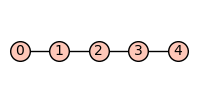

In [15]:
### Path
g = graphs.PathGraph(5)
g.show(figsize=[2,2])

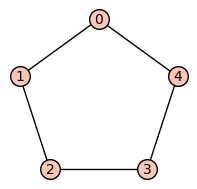

In [16]:
### Cycle
g = graphs.CycleGraph(5)
g.show(figsize=[2,2])

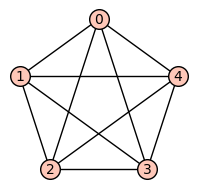

In [21]:
### complete graph
g = graphs.CompleteGraph(5)
g.show(figsize=[2,2])

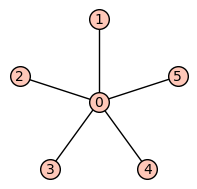

In [22]:
### star graph
g = graphs.StarGraph(5)
g.show(figsize=[2,2])

也可以從頭建造一個圖  
設定好點集 `V` 以及邊集 `E`  
並用 `Graph([V, E])` 建立一個圖

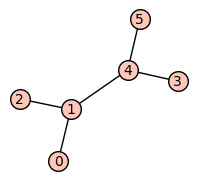

In [31]:
V = [0,1,2,3,4,5]
E = [(0,1), (1,2), (1,4), (3,4), (4,5)]
g = Graph([V, E])
g.show(figsize=[2,2])

有需要可以再增加點或邊  
（如果邊的點原本不存在  
則會自動加入）

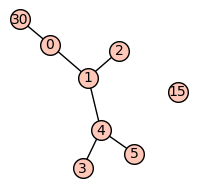

In [32]:
g.add_vertex(15)
g.add_edge(0,30)
g.show(figsize=[2,2])

若 `g` 是 Sage 中的一個圖  
則可以用 `g.show()` 來顯示  
繪圖有許多參數可以調整  
參考[官方說明書](http://doc.sagemath.org/html/en/reference/plotting/sage/graphs/graph_plot.html)

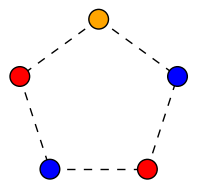

In [39]:
g = graphs.CycleGraph(5)
g.show(figsize=[2,2],
       vertex_labels=False,
       vertex_colors={'red':[1,3], 'blue':[2,4], 'orange':[0]},
       edge_style='--'
      )

### 圖同構
如果兩個圖可以把點和點對起來  
使得相對應的邊也對起來  
則兩個圖則視為**同構**

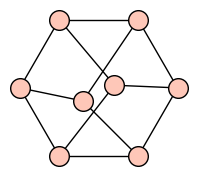

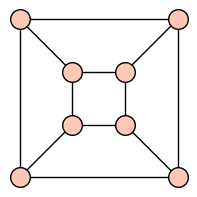

In [62]:
g = graphs.CubeGraph(3)
pos = g.get_pos()
pos['010'] = (0.7,0.9)
pos['101'] = (0.3,0.7)
g.set_pos(pos)
g.show(figsize=[2,2], vertex_labels=False)

V = [0,1,2,3,4,5,6,7]
E = [(0,1), (1,2), (2,3), (3,0), (0,4), (1,5), (2,6), (3,7), (4,5), (5,6), (6,7), (7,4)]
pos = {0:(0,0), 1:(3,0), 2:(3,3), 3:(0,3), 4:(1,1), 5:(2,1), 6:(2,2), 7:(1,2)}
h = Graph([V, E], pos=pos)
h.show(figsize=[2,2], vertex_labels=False)

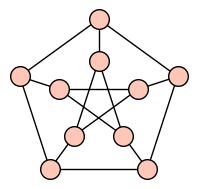

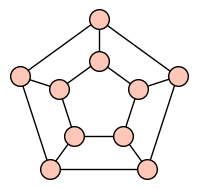

In [111]:
Petersen = graphs.PetersenGraph()
Peterson = Petersen.copy()
Peterson.delete_edges([(5,7), (7,9), (9,6), (6,8), (8,5)])
Peterson.add_edges([(5,6), (6,7), (7,8), (8,9), (9,5)])
Petersen.show(figsize=[2,2], vertex_labels=False)
Peterson.show(figsize=[2,2], vertex_labels=False)

## 圖的不變量
圖會因為標號的不同而有些差異  
但有些性質並不會隨著標號改變  
比如說點數、邊數  
這些性質叫作圖的**不變量**  
它們可以用來幫忙判斷圖是否同構

若 `g` 是 Sage 裡的圖  
則 `g.order()` 回傳點數  
而 `g.size()` 回傳邊數

In [71]:
g = graphs.PetersenGraph()
print(g.order())
print(g.size())

10
15


### 度數
圖中一個點相連的邊數  
稱作這個點的**度數**

比如說下圖中  
點 0 的度數為 5  
其餘點的度數皆為 1

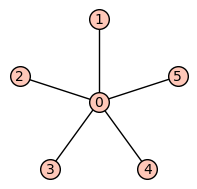

In [68]:
g = graphs.StarGraph(5)
g.show(figsize=[2,2])

把每個點的度數收集起來  
所形成（元素可重覆）的集合  
稱作圖的**度數數列**  
同構的圖必須要有相同的度數數列

In [69]:
g.degree_sequence()

[5, 1, 1, 1, 1, 1]

#### 圖論第一定理
圖的度數總合  
等於兩倍的邊數

In [70]:
print(sum(g.degree_sequence()))
print(2 * g.size())

10
10


因此度數數列的總合永遠是偶數  
而度數為奇數的點一定有偶數個

### 連通
若一個圖中的任兩點  
都可以經由一連串的邊接起來  
則這個圖為**連通的**

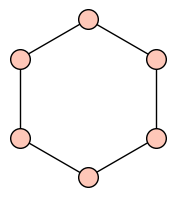

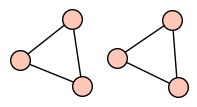

In [73]:
g = graphs.CycleGraph(6)
h = graphs.CompleteGraph(3).disjoint_union(graphs.CompleteGraph(3))
g.show(figsize=[2,2], vertex_labels=False)
h.show(figsize=[2,2], vertex_labels=False)

大的圖不見得  
一眼就可以看出是否連通  
後面我們會介紹演算法  
來判斷圖的連通性

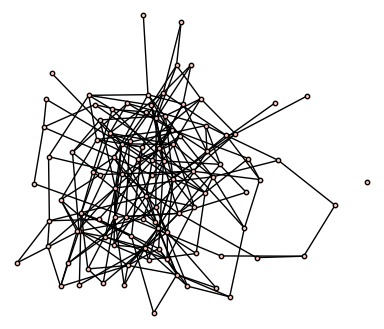

False

In [107]:
g = graphs.RandomGNP(100,0.05)
g.show(vertex_labels=False, vertex_size=10)
g.is_connected()

### 路徑數  
一個從點 $i$ 到點 $j$ 的路徑  
指的是一群點 $i = v_0\sim v_1\sim\cdots\sim v_k =j$  
這裡 $k$ 是路徑的長度  
定義 $p_k(i,j)$ 為  
$i$ 和 $j$ 中長度為 $k$ 的路徑數

固定一個長度 $k$ 以及一個整數 $d$  
圖上有幾組點 $(i,j)$ 滿足 $p_k(i,j)=d$  
這樣的組數也是圖的不變量

比如說 $p_1(i,j)=1$ 的組數  
就是圖的邊數

#### 相鄰矩陣
一個 $n$ 個點的圖的**相鄰矩陣**  
是一個 $n\times n$ 的矩陣  
如果點 $i,j$ 有邊則矩陣的 $i,j$-項為 $1$  
如果點 $i,j$ 沒邊則矩陣的 $i,j$-項為 $0$

In [113]:
g = graphs.PathGraph(4)
g.adjacency_matrix()

[0 1 0 0]
[1 0 1 0]
[0 1 0 1]
[0 0 1 0]

#### 定理
若 $A$ 為圖 $G$ 的相鄰矩陣  
則 $A^k$ 的 $i,j$-項  
等於 $p_k(i,j)$

In [116]:
g = graphs.PathGraph(4)
A = g.adjacency_matrix()
A**2

[1 0 1 0]
[0 2 0 1]
[1 0 2 0]
[0 1 0 1]

回顧 `Petersen` 及 `Peterson`

In [117]:
A1 = Petersen.adjacency_matrix()
A2 = Peterson.adjacency_matrix()
print("A1^2 =")
print(A1**2)
print("A2^2 =")
print(A2**2)

A1^2 =
[3 0 1 1 0 0 1 1 1 1]
[0 3 0 1 1 1 0 1 1 1]
[1 0 3 0 1 1 1 0 1 1]
[1 1 0 3 0 1 1 1 0 1]
[0 1 1 0 3 1 1 1 1 0]
[0 1 1 1 1 3 1 0 0 1]
[1 0 1 1 1 1 3 1 0 0]
[1 1 0 1 1 0 1 3 1 0]
[1 1 1 0 1 0 0 1 3 1]
[1 1 1 1 0 1 0 0 1 3]
A2^2 =
[3 0 1 1 0 0 2 0 0 2]
[0 3 0 1 1 2 0 2 0 0]
[1 0 3 0 1 0 2 0 2 0]
[1 1 0 3 0 0 0 2 0 2]
[0 1 1 0 3 2 0 0 2 0]
[0 2 0 0 2 3 0 1 1 0]
[2 0 2 0 0 0 3 0 1 1]
[0 2 0 2 0 1 0 3 0 1]
[0 0 2 0 2 1 1 0 3 0]
[2 0 0 2 0 0 1 1 0 3]


會發現 `Petersen`  
完全沒有一組 $(i,j)$ 滿足 $p_2(i,j)=2$  
但 `Peterson`  
卻有 8 組  
因此兩圖不同構

### 最小圈
圖上的一個**圈**  
指的是一個起點和終點相同的路徑  
而此外其餘任兩點皆不重覆

圈的長度為圈上的邊數  
一個圈上的最小圈的長度  
也是圈的不變量  
可以用 `g.girth()` 來計算

In [118]:
print(Petersen.girth())
print(Peterson.girth())

5
4


再次看到兩圖不同構

### 生成樹
一個圖如果是連通的  
而且圖上沒有圈  
則被成為**樹**


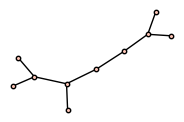

In [120]:
g = graphs.RandomTree(10)
g.show(figsize=[2,2], vertex_labels=False, vertex_size=10)

$n$ 個點上的樹一定剛好 $n-1$ 條邊

一個圖上選 $n-1$ 條邊  
使得這些邊形成一個樹  
則稱為這個圖的**生成樹**  

生成樹的個數是圖的不變量

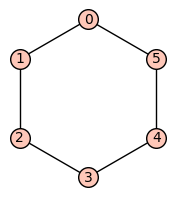

In [121]:
g = graphs.CycleGraph(6)
g.show(figsize=[2,2])

#### 拉普拉斯矩陣
給定一個圖 $G$  
令 $D$ 為一個對角線為 $G$ 的度數列表的對角矩陣  
令 $A$ 為 $G$ 的相鄰矩陣  
則 $G$ 的拉普拉斯矩陣定義為 $D-A$

In [123]:
g = graphs.CycleGraph(6)
L = g.laplacian_matrix()
L

[ 2 -1  0  0  0 -1]
[-1  2 -1  0  0  0]
[ 0 -1  2 -1  0  0]
[ 0  0 -1  2 -1  0]
[ 0  0  0 -1  2 -1]
[-1  0  0  0 -1  2]

#### 矩陣樹定理
令 $L$ 為圖 $G$ 的拉普拉斯矩陣  
而 $L'$ 為將 $L$ 的第零行第零列去掉的矩陣  
則 $|\det(L')|$ 為圖生成樹的個數

In [124]:
Lprime = L[1:,1:]
Lprime.determinant()

6

## 搜尋演算法
圖上的搜尋演算法  
目的是在圖上有系統地搜尋所有點  
（或是邊、或是都找）

以下是兩種常見的搜尋演算法：

1. 深度優先搜尋 Depth-first search（DFS）
2. 廣度優先搜尋 Breadth-first search（BFS）

這兩種演算法也可以用來判斷一個圖是否連通

In [15]:
### 先執行這段程式碼

def DFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.depth_first_search(v):
        if searched:
            for i in range(1,len(searched)+1):
                if g.has_edge(new,searched[-i]):
                    parent = searched[-i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def BFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.breadth_first_search(v):
        if searched:
            for i in range(len(searched)):
                if g.has_edge(new,searched[i]):
                    parent = searched[i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def greedy_coloring(g, color_order=None):
    n = g.order()
    ### ideally, len(color_order) == n
    if color_order == None:
        color_order = g.vertices()
    color_order = list(color_order) ### change the type in case it is a generator
    num_c = {k: [] for k in range(n)}
    for s in range(n):
        new = color_order[s]
        for k in range(n):
            for u in num_c[k]:
                if g.has_edge(u,new):
                    break;
            else:
                num_c[k].append(new)
                break;
    num_c_used = [k for k in range(n) if num_c[k]]
    greedy_chi = len(num_c_used)
    colors = rainbow(greedy_chi) 
    c = {colors[k]: num_c[k] for k in range(greedy_chi)}
    return c

def illustrate_FS(g, v, alg='DFS', searching_tree=True, coloring=False):
    ### g should have its position saved
    ### if not do g.plot(save_pos) first
    if alg == 'DFS':
        arcs = DFS_tree(g,v)
        full_name = 'Depth-First Search at {}'.format(v)
    if alg == 'BFS':
        arcs = BFS_tree(g,v)
        full_name = 'Breadth-First Search at {}'.format(v)
    steps = len(arcs)
    pic1 = g.plot()
    
    if coloring:
        color_order = [v] + [arc[1] for arc in arcs]
        c = greedy_coloring(g, color_order)
    else:
        c = {}
        
    @interact
    def _(step=slider(list(range(steps+1))), t = text_control(full_name)):
        g_pos = g.get_pos()
        arcs_show = arcs[:step] if searching_tree else []
        pic2 = DiGraph([g.vertices(),arcs_show], pos=g_pos).plot(edge_color='red', vertex_colors=c)
        unreached = [arc[1] for arc in arcs[step:]]
        cover = Graph([unreached,[]], pos={u: g_pos[u] for u in unreached}).plot()
        p = pic1 + pic2 + cover
        p.axes(False)
        p.show()

### 深度優先搜尋 Depth-first search（DFS）
能往前就往前  
不能再往前時，往回退到還能往前的點繼續

例子：走迷宮

In [127]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS')

### 廣度優先搜尋 Breadth-first search（BFS）
先把附近找完  
附近沒了，再從第一個附近還沒找完的點繼續

例子：找兩點之間的最短路徑

In [128]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS')

## 動手試試看

##### 練習 1
一個圖的獨立集指的是  
一個點集 `S` 且 `S` 中的任兩點都不相連  
寫一個函數 `is_indep（G, S)`  
其功能為回傳 `S` 是否為圖 `G` 的獨立集

In [ ]:
### your answer here

##### 練習 2
給定 `g = graphs.Petersen()`  
找出 `g` 中所有的獨立集

In [ ]:
### your answer here

##### 練習 3
寫一個函數 `max_indep(g)`  
其功能為回傳圖 `g` 中
一個點數最大的獨立集  

In [ ]:
### your answer here

匹配數 matching number

In [1]:
g = graphs.PathGraph(3)
h = graphs.CompleteGraph(3)

In [2]:
for per in Permutations(3):
    print(per)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


In [11]:
g.relabel(['a',2,3])

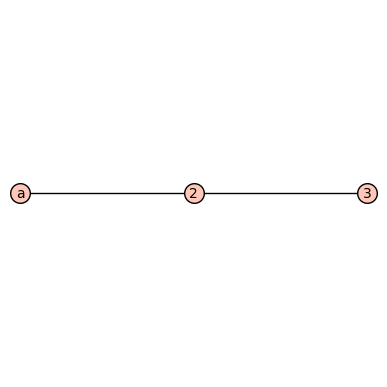

In [13]:
g.show()

著色數

一筆畫問題

##### 練習
若 $v_1 = (3,5)$ 且 $v_2 = (-2,-4)$。  
計算 $10 v_1 + 5 v_2$。